# Plotting Chicago COVID cases using data from the [Chicago Data Portal](https://data.cityofchicago.org/)

See the data/ directory for more information about this data set.  

Note: if you are working from the geo_forge conda environment, you will need to install pandas and geopandas
```
$ conda activate geo_forge
$ conda install --channel conda-forge geopandas pandas
```

In [261]:
import rasterio
from rasterio.plot import show as showRasterio

import pandas as pd
import geopandas as gpd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

%matplotlib inline

In [58]:
df = pd.read_csv('data/COVID-19_Cases__Tests__and_Deaths_by_ZIP_Code.csv')
df = df.loc[df['Population'] > 0].dropna(subset=['ZIP Code Location'])
df['ZIP Code Location'] = gpd.GeoSeries.from_wkt(df['ZIP Code Location'])
df['Week Start'] = pd.to_datetime(df['Week Start'])
df['Week End'] = pd.to_datetime(df['Week End'])
df['Cases - Weekly Fraction'] = df['Cases - Weekly']/df['Population']
df['Cases - Cumulative Fraction'] = df['Cases - Cumulative']/df['Population']
df

ZIP Code  Week Number Week Start   Week End  Cases - Weekly  \
0       60607            2 2021-01-10 2021-01-16            75.0   
1       60601           49 2021-12-05 2021-12-11            35.0   
2       60606           49 2021-12-05 2021-12-11            12.0   
3       60608            4 2021-01-24 2021-01-30           122.0   
4       60609           14 2020-03-29 2020-04-04            52.0   
...       ...          ...        ...        ...             ...   
5574    60621           47 2021-11-21 2021-11-27            38.0   
5575    60625           47 2021-11-21 2021-11-27            88.0   
5577    60605           47 2021-11-21 2021-11-27            30.0   
5578    60616           47 2021-11-21 2021-11-27            49.0   
5579    60652           47 2021-11-21 2021-11-27            59.0   

      Cases - Cumulative  Case Rate - Weekly  Case Rate - Cumulative  \
0                 2111.0               254.0                  7133.9   
1                 1690.0               238.0                 11516.2   
2                  463.0               387.0                 14930.7   
3                 7157.0               154.0                  9036.0   
4                  112.0                85.0                   182.1   
...                  ...                 ...                     ...   
5574              3161.0               131.0                 10884.2   
5575              9042.0               111.0                 11410.5   
5577              2485.0               109.0                  9030.1   
5578              4652.0                90.0                  8541.4   
5579              6366.0               134.0                 14498.8   

      Tests - Weekly  Tests - Cumulative  ...  \
0             1745.0               38808  ...   
1             1264.0               65981  ...   
2              413.0               20716  ...   
3             2154.0               77216  ...   
4              151.0                 342  ...   
...              ...                 ...  ...   
5574          1836.0               64052  ...   
5575          6098.0              216783  ...   
5577          1405.0               76095  ...   
5578          2554.0              130581  ...   
5579          2167.0               97441  ...   

      Percent Tested Positive - Cumulative  Deaths - Weekly  \
0                                      0.0                1   
1                                      0.0                0   
2                                      0.0                0   
3                                      0.1                2   
4                                      0.3                3   
...                                    ...              ...   
5574                                   0.1                1   
5575                                   0.0                0   
5577                                   0.0                0   
5578                                   0.0                0   
5579                                   0.1                0   

      Deaths - Cumulative  Death Rate - Weekly  Death Rate - Cumulative  \
0                       6                  3.4                     20.3   
1                      12                  0.0                     81.8   
2                       4                  0.0                    129.0   
3                     128                  2.5                    161.6   
4                       3                  4.9                      4.9   
...                   ...                  ...                      ...   
5574                  106                  3.4                    365.0   
5575                  208                  0.0                    262.5   
5577                   14                  0.0                     50.9   
5578                  111                  0.0                    203.8   
5579                  110                  0.0                    250.5   

      Population         Row ID           ZIP Code Location  \
0          29

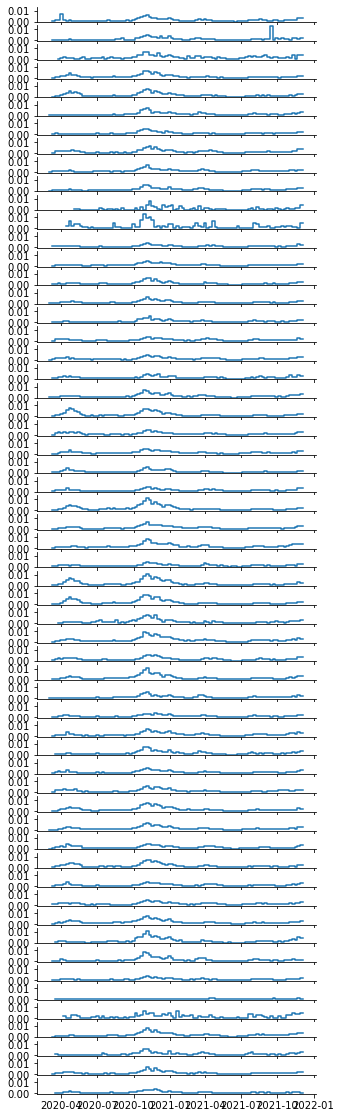

In [100]:
allZipCodes = pd.unique(df['ZIP Code'])
f, ax = plt.subplots(len(allZipCodes), 1, sharex = True, sharey = True, figsize = (5, 20))

for i, z in enumerate(allZipCodes):
    df1 = df.loc[df['ZIP Code'] == z].sort_values('Week Start')
    ax[i].step(df1['Week Start'], df1['Cases - Weekly']/df1['Population'])

    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)

In [220]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

(0.0, 0.03)

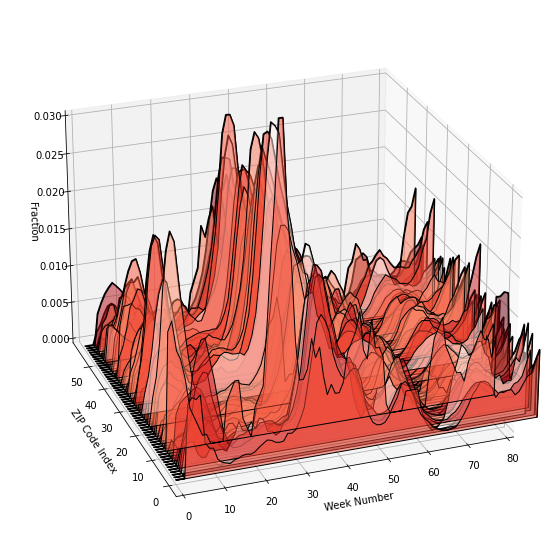

In [270]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

for i, z in enumerate(allZipCodes):
    df1 = df.loc[(df['ZIP Code'] == z) & (df['Population'] > 0) & (pd.notnull(df['Cases - Weekly']))].sort_values('Week Start').reset_index(drop=True)
    if (len(df1.index) > 0):
        xline = np.append(df1.index,max(df1.index))
        #yline = np.full_like(xline, z)
        yline = np.full_like(xline, i)
        zline = np.append((df1['Cases - Weekly'].rolling(4).sum().fillna(0)/df1['Population']), 0)
        verts = [list(zip(xline,yline,zline))]
        co = list(cmap(zipCodes.iloc[i]['COVID Fraction Normalized']))
        co[3] = 0.5
        poly = Poly3DCollection(verts, facecolors=[co], edgecolors=['black'])
        ax.add_collection3d(poly)
        ax.plot3D(xline, yline, zline,  'black', zorder=1)

        
ax.view_init(elev=25., azim=250)
ax.set_xlabel('Week Number')
ax.set_xlim3d(0, 80)

ax.set_ylabel('ZIP Code Index')
#ax.set_ylim3d(min(zs), max(zs))
#ax.set_ylim3d(60601, 60700)

ax.set_zlabel('Fraction')
ax.set_zlim3d(0, 0.03)

In [171]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');


[ 0.          0.01501445  0.03002552  0.04502981  0.06002396  0.07500457
  0.08996827  0.10491169  0.11983146  0.13472422  0.14958659  0.16441525
  0.17920684  0.19395803  0.20866549  0.2233259   0.23793597  0.2524924
  0.26699191  0.28143122  0.29580708  0.31011626  0.32435552  0.33852165
  0.35261147  0.36662179  0.38054946  0.39439134  0.4081443   0.42180524
  0.4353711   0.4488388   0.46220531  0.47546761  0.48862273  0.50166769
  0.51459954  0.52741539  0.54011232  0.5526875   0.56513807  0.57746123
  0.58965421  0.60171425  0.61363863  0.62542468  0.63706972  0.64857114
  0.65992634  0.67113277  0.68218788  0.69308921  0.70383427  0.71442066
  0.72484599  0.7351079   0.74520409  0.75513227  0.76489021  0.77447571
  0.7838866   0.79312077  0.80217614  0.81105065  0.81974232  0.82824918
  0.83656931  0.84470085  0.85264195  0.86039082  0.86794572  0.87530494
  0.88246684  0.88942978  0.8961922   0.90275258  0.90910944  0.91526134
  0.9212069   0.92694478  0.93247368  0.93779236  0.

In [255]:
x = list(cmap(zipCodes.iloc[i]['COVID Fraction Normalized']))
x[3] = 0.5
x

[0.44206074586697425, 0.00922722029988466, 0.05590157631680122, 0.5]

In [28]:
zipCodes = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')

In [29]:
zipCodes['COVID Fraction'] = 0.
for i, rowPoint in gdf.iterrows():
    point = rowPoint['ZIP Code Location']
    for j, rowPoly in zipCodes.iterrows():
        poly = rowPoly['geometry']
        if point.within(poly):
            zipCodes.at[j, 'COVID Fraction'] += rowPoint['Cases - Cumulative Fraction'] 

In [30]:
# maxCOVIDFrac = max(df['Cases - Weekly Fraction'])
# minCOVIDFrac = min(df['Cases - Weekly Fraction'])
maxCOVIDFrac = max(zipCodes['COVID Fraction'])
minCOVIDFrac = min(zipCodes['COVID Fraction'])
zipCodes['COVID Fraction Normalized'] = (zipCodes['COVID Fraction'] - minCOVIDFrac)/(maxCOVIDFrac - minCOVIDFrac)

In [32]:
cmapName = 'Reds'
cmap = cm.get_cmap(cmapName)

f,ax = plt.subplots(figsize=(10,12))
plt.tight_layout()

chicago = rasterio.open('../ChicagoGeoTIFF.tif')
showRasterio(chicago.read(), ax = ax, transform=chicago.transform)

co = cmap(zipCodes['COVID Fraction Normalized'])
ap = (zipCodes['COVID Fraction Normalized']).clip(0,1)
im = zipCodes.plot(ax = ax, color = co, zorder = 3, alpha = ap)
zipCodes.plot(ax = ax, zorder = 3, facecolor = 'none', edgecolor = 'white')

ax.set_xlim(-87.87, -87.5)
ax.set_ylim(41.63, 42.03)

ax.set_xlabel('Longitude', fontsize = 16)
ax.set_ylabel('Latitude', fontsize = 16)

norm = Normalize(vmin = 0, vmax = 1)
n_cmap = cm.ScalarMappable(norm = norm, cmap = cmapName)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap, orientation = 'vertical', location = 'right', shrink = 0.94)



chicago.close()

In [67]:
import plotly.express as px

In [85]:
fig = px.choropleth(zipCodes, geojson = zipCodes.geometry, locations = zipCodes.index, color = 'COVID Fraction Normalized',
                   color_continuous_scale=px.colors.sequential.Reds,
                   hover_data = {'zip':True})
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [77]:
zipCodes

objectid    shape_area     shape_len    zip  \
0       33.0  1.060523e+08  42720.044406  60647   
1       34.0  1.274761e+08  48103.782721  60639   
2       35.0  4.506904e+07  27288.609612  60707   
3       36.0  7.085383e+07  42527.989679  60622   
4       37.0  9.903962e+07  47970.140153  60651   
..       ...           ...           ...    ...   
56      57.0  1.552855e+08  53406.915617  60623   
57      58.0  2.111148e+08  58701.325375  60629   
58      59.0  2.116961e+08  58466.160298  60620   
59      60.0  1.254243e+08  52377.854541  60637   
60      61.0  1.678720e+08  53040.907078  60619   

                                             geometry  COVID Fraction  \
0   POLYGON ((-87.67762 41.91776, -87.67761 41.917...        0.075889   
1   POLYGON ((-87.72683 41.92265, -87.72693 41.922...        0.129523   
2   POLYGON ((-87.78500 41.90915, -87.78531 41.909...        0.000000   
3   POLYGON ((-87.66707 41.88885, -87.66707 41.888...        0.071259   
4   POLYGON ((-87.70656 41.89555, -87.70672 41.895...        0.095890   
..                                                ...             ...   
56  POLYGON ((-87.69479 41.83008, -87.69486 41.830...        0.106782   
57  POLYGON ((-87.68306 41.75786, -87.68306 41.757...        0.126509   
58  POLYGON ((-87.62373 41.72167, -87.62388 41.721...        0.057683   
59  POLYGON ((-87.57691 41.79511, -87.57700 41.795...        0.050807   
60  POLYGON ((-87.58592 41.75150, -87.58592 41.751...        0.054034   

    COVID Fraction Normalized  
0                    0.585916  
1                    1.000000  
2                    0.000000  
3                    0.550170  
4                    0.740337  
..                        ...  
56                   0.824426  
57                   0.976731  
58                   0.445353  
59                   0.392264  
60                   0.417176  

[61 rows x 7 columns]